# Song Popularity 

In [1]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

## Data Preprocessing

In [4]:
spotify = pd.read_csv('spotify.csv')

In [7]:
spotify.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [12]:
X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']
X.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [14]:
X.head()

,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Now we will divide the features into numerical and categorical

In [15]:
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

In [16]:
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

In [25]:
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)
print(X_train.shape)
print(y_train.shape)

(24132, 22)
(24132,)


In [26]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 
y_valid = y_valid / 100
print(X_train.shape)
print(y_train.shape)

(24132, 18)
(24132,)


In [22]:
input_shape = [X_train.shape[1]]
X_train

array([[ 0.65688455,  1.20134593,  0.17191581, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50623009,  0.64558889,  1.55316346, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15698568,  1.28388411, -1.20933184, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.89074757,  0.48601509, -1.48558137, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17856288,  1.04727467, -0.93308231, ...,  0.        ,
         0.        ,  0.        ],
       [-0.33606526,  1.02526449, -0.10433372, ...,  0.        ,
         0.        ,  0.        ]])

In [27]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])

model.compile(
    optimizer='adam',
    loss='mae',
)

In [28]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, 
)

Minimum Validation Loss: 0.2005


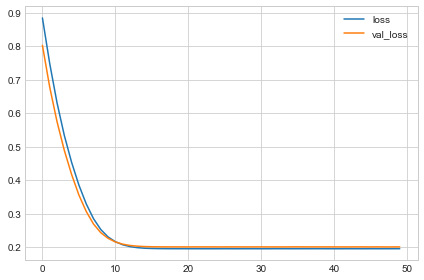

In [29]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.2005


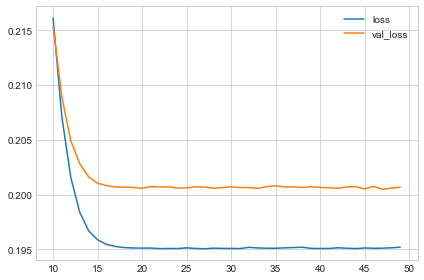

In [30]:
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Epoch 1/50
48/48 [==============================] - 1s 6ms/step - loss: 0.2160 - val_loss: 0.2072
Epoch 2/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1971 - val_loss: 0.2045
Epoch 3/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1934 - val_loss: 0.2038
Epoch 4/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1906 - val_loss: 0.2044
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1887 - val_loss: 0.2023
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1865 - val_loss: 0.2022
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1855 - val_loss: 0.2048
Epoch 8/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1844 - val_loss: 0.2025
Epoch 9/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1835 - val_loss: 0.2015
Epoch 10/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1822 - val_loss: 0.2022
Epoch 11/50
48/48 [

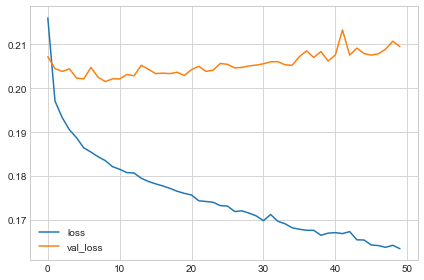

In [31]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));